In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
np.random.seed(42)

# 1. Import the train datasets

In [3]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [4]:
Model_1 = RandomForestRegressor()

# 2. Setup Pipeline

In [5]:
pca=PCA()
RG = Model_1

In [6]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("RG",RG)])

In [7]:
param_grid = {
    "pca__n_components": [5, 45, 100,170],
    "RG__ccp_alpha":[0.005,0.1,0.5,10],
    "RG__n_estimators":[10,100,1000]
    
}

# 3. Setup GridSearch

In [8]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [9]:
search.fit(X_train,Y_train)

C:\Users\Wayne Linn\anaconda3\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RG', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'RG__ccp_alpha': [0.005, 0.1, 0.5, 10],
                         'RG__n_estimators': [10, 100, 1000],
                         'pca__n_components': [5, 45, 100, 170]},
             scoring='neg_mean_squared_error')

In [10]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.636):
{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000, 'pca__n_components': 170}


In [11]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RG__ccp_alpha,param_RG__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
11,511.889204,33.493665,0.247470,0.209785,0.005,1000,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.585163,-0.560301,...,-0.733135,-0.826115,-0.546035,-0.605587,-0.624114,-0.692771,-0.580500,-0.636206,0.083738,1
7,43.546421,12.064673,0.038951,0.051147,0.005,100,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.601395,-0.572197,...,-0.735737,-0.829381,-0.562844,-0.595084,-0.642698,-0.686265,-0.599552,-0.644253,0.079500,2
3,4.609559,2.305032,0.025133,0.035700,0.005,10,170,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.643966,-0.625752,...,-0.778498,-0.930828,-0.598158,-0.662281,-0.665287,-0.752495,-0.654216,-0.697202,0.093502,3
9,172.146359,26.423320,0.266833,0.213116,0.005,1000,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.719015,-0.684397,...,-0.910886,-0.961245,-0.710453,-0.704489,-0.775010,-0.800105,-0.736611,-0.781120,0.087475,4
10,373.167434,36.031322,0.235870,0.218899,0.005,1000,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.729559,-0.712278,...,-0.903635,-0.979575,-0.719961,-0.719759,-0.773155,-0.799389,-0.757257,-0.789967,0.083700,5
5,19.037496,5.065802,0.071210,0.060382,0.005,100,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.718102,-0.697489,...,-0.907205,-1.016978,-0.710202,-0.732798,-0.772428,-0.797109,-0.746927,-0.792251,0.095861,6
6,33.417998,6.851889,0.018549,0.006436,0.005,100,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.742703,-0.713385,...,-0.895976,-0.982866,-0.711052,-0.722674,-0.791181,-0.792502,-0.762506,-0.793727,0.083052,7
1,1.613685,0.899702,0.016013,0.016558,0.005,10,45,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.816960,-0.725779,...,-0.946313,-1.023692,-0.703261,-0.744141,-0.807660,-0.785590,-0.782643,-0.823048,0.096899,8
2,4.367383,2.325032,0.006383,0.004420,0.005,10,100,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.739165,-0.766097,...,-0.981308,-1.031347,-0.754016,-0.781385,-0.808574,-0.827079,-0.760831,-0.828824,0.094454,9
8,40.819286,9.563261,0.382315,0.268876,0.005,1000,5,"{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1...",-0.779506,-0.789750,...,-0.939212,-1.103162,-0.780039,-0.777653,-0.807454,-0.863562,-0.799248,-0.853283,0.098544,10


# 4. Best Hyperparameter

In [12]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'RG__ccp_alpha': 0.005, 'RG__n_estimators': 1000, 'pca__n_components': 170}


# 5. Evaluate Model $log(Sales)$

In [13]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_ccp_alpha = parms.iloc[0][0]['RG__ccp_alpha']
best_n_est = parms.iloc[0][0]['RG__n_estimators']

In [14]:
Model_2 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [15]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [16]:
pca1 = PCA(n_components=best_pca)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
RG1 = Model_2
RG1.fit(PX_train1,Y_train1)

<ipython-input-16-fbb0627d7471>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG1.fit(PX_train1,Y_train1)


RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [17]:
pca2 = PCA(n_components=best_pca)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [18]:
MSE(RG1.predict(PX_test1),Y_test1)

1.482014819873732

In [19]:
result = pd.DataFrame(np.exp(Y_test1))

In [20]:
result["Predicted_sales"] = np.exp(RG1.predict(PX_test1))

In [21]:
MSE(result["sales"],result["Predicted_sales"])

934.2429138631863

# 5.1 Model using original sales data

In [22]:
Model_3 = RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [23]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [24]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [25]:
pca3 = PCA(n_components=best_pca)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
RG2 = Model_3
RG2.fit(PX_train2,Y_train2)

<ipython-input-25-92233a376675>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG2.fit(PX_train2,Y_train2)


RandomForestRegressor(ccp_alpha=0.005, n_estimators=1000)

In [26]:
pca4 = PCA(n_components=best_pca)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [27]:
MSE(RG2.predict(PX_test2),Y_test2)

2880.8532184377455

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [28]:
residual = result['sales']-result['Predicted_sales']

In [29]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [30]:
import scipy.stats as sct

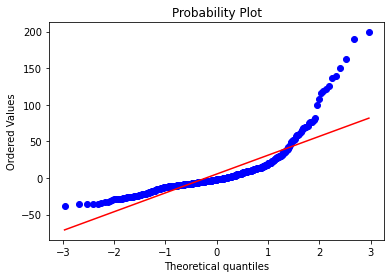

In [31]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [32]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

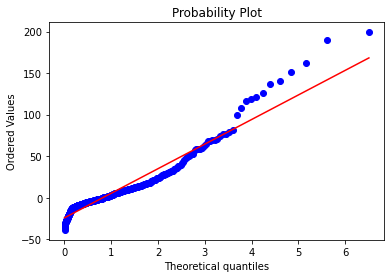

In [33]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [34]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

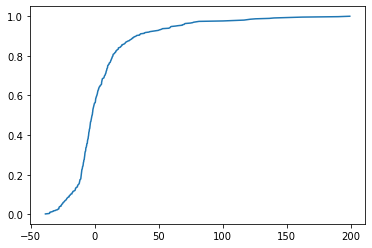

In [35]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

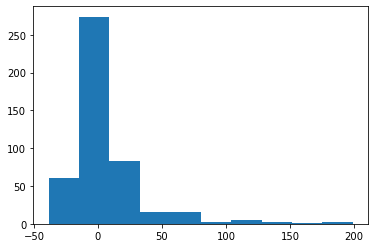

In [36]:
plt.hist(Sample)
plt.show()

In [37]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [38]:
offset = inv(Sample,jumps,2/3)
offset

5.255975036283761

In [39]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [40]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [41]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [42]:
#Profit (None)
profit_lst = profit(round(result['sales']),round(result['Predicted_sales']))
profit_lst.sum()

28860.0

In [43]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

27352.0

In [44]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

29300.0

In [45]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

30192.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [46]:
Model_4= RandomForestRegressor(ccp_alpha=best_ccp_alpha,n_estimators=best_n_est)

In [47]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca,random_state=42)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    RG_K = Model_4
    RG_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca,random_state=42)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(np.exp(RG_K.predict(PX_test_K)),np.exp(Y_test_K)))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(RG_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual_K.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size_K+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

<ipython-input-47-89de65424509>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-47-89de65424509>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-47-89de65424509>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-47-89de65424509>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RG_K.fit(PX_train_K,Y_train_K)
<ipython-input-47-89de65424509>:24: DataConversionWarning: A column-vector y was passed when a 1d array 

In [48]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.295766,0.374934,0.292293,0.197339,0.132716,0.377587,0.112318,0.350390,0.304402,0.277852,0.271560
Exponential,0.328533,0.373696,0.282530,0.291674,0.271878,0.375948,0.214017,0.329315,0.350394,0.332309,0.315029
Empirical,0.335299,0.392523,0.316572,0.295880,0.281708,0.396435,0.227986,0.359497,0.359968,0.337591,0.330346


In [49]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,12240.0,16968.0,13532.0,9196.0,6588.0,14744.0,5500.0,16160.0,13608.0,11572.0,12010.8,3661.838686
Exponential,13596.0,16912.0,13080.0,13592.0,13496.0,14680.0,10480.0,15188.0,15664.0,13840.0,14052.8,1641.359242
Empirical,13876.0,17764.0,14656.0,13788.0,13984.0,15480.0,11164.0,16580.0,16092.0,14060.0,14744.4,1743.188297
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [50]:
mse_table = pd.DataFrame(mse_lst,index=col_name,columns=['Cross Validation MSE'])
mse_table

,Cross Validation MSE
Dataset_1,913.613209
Dataset_2,1026.984095
Dataset_3,1565.054945
Dataset_4,2539.422420
Dataset_5,4108.826441
Dataset_6,779.774218
Dataset_7,2582.488244
Dataset_8,1075.836077
Dataset_9,1500.933621
Dataset_10,1048.415053


In [51]:
print(f"Average 10 fold CV MSE:  {float(mse_table.mean())}")

Average 10 fold CV MSE:  1714.1348323088466


In [52]:
profit_table.to_csv(".\\Model_Selection_Result\\4.2A_Random_forest.csv")

In [53]:
name = "4.2A_Random_forest.csv"
mse_table.to_csv(f".\\Model_CV_Result_MSE\\{name}")

In [54]:
f = pd.DataFrame(fraction_table['mean_fraction'])
f = f.transpose().reset_index()
f.to_csv(f".\\Model_CV_Result_Efficiency\\{name}")